<a href="https://colab.research.google.com/github/martinalegre77/python/blob/main/IA_tp4_LuisMartinAlegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Siglo 21
## Materia: Inteligencia Artificial
### Trabajo Práctico Nro 4
#### Alumno: Luis Martín Alegre

# Prototipo que aplica la transformada de Hough.

In [2]:
# Acceso a Drive donde estan las imágenes
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


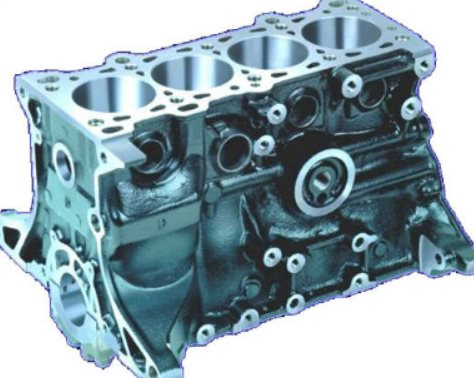

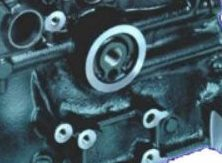

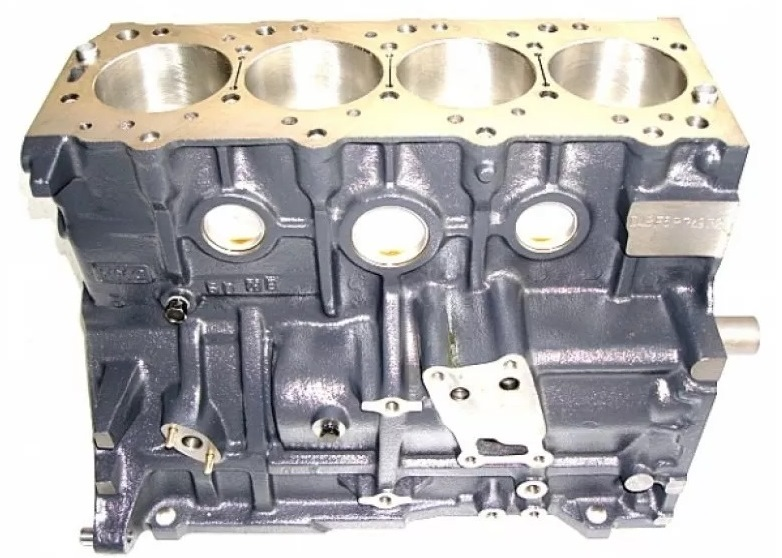

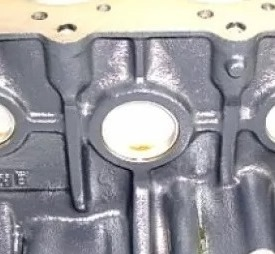

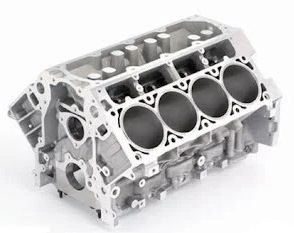

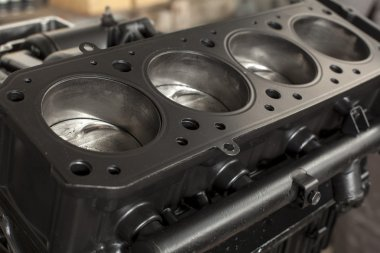

In [17]:
# librerias
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# imagenés disponibles para análisis
img = ['block1.jpg', 'block2.jpg','block3.jpg',
       'block4.jpg', 'block5.jpg', 'block6.jpg'
       ]

# carga de las imagenenes
for i in img:
  imagen = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/fotos/{i}', cv2.IMREAD_COLOR)
  cv2_imshow(imagen)


# 2.	Desarrollar e implementar un prototipo destinado a la transformada de Hough de rectas en el contexto de un caso sencillo.

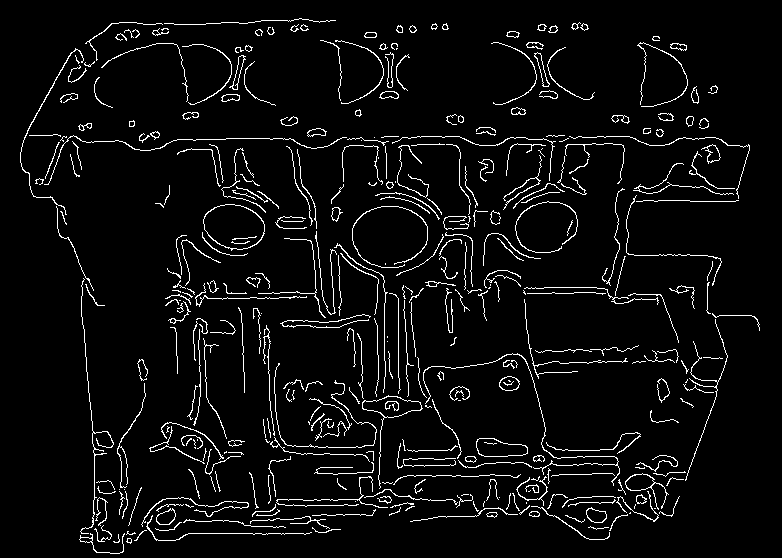

In [18]:
# carga de la imagen
imagen = cv2.imread('/content/drive/MyDrive/Colab Notebooks/fotos/block3.jpg', cv2.IMREAD_COLOR)

# convertir la imagen a escala de grises
img_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# desenfocar para reducir el ruido y mejorar la detección de los bordes
""" la tupla (9,9) es la dimensión de la matriz de los datos de cada pixel
 de la imagen. Usualmente se usa 3x3 o 5x5, pero con 9x9, si bien utiliza
 más memoria, se logran mejores resultados."""
img_foco = cv2.GaussianBlur(img_gris, (9, 9), 2)

# proceso para detectar lineas/bordes
bordes = cv2.Canny(img_foco,50,120)
lineas = cv2.HoughLinesP(
    bordes,
    1,
    np.pi/180,
    100,
    minLineLength = 20,
    maxLineGap = 5)

# dibujar las lineas/bordes reconocidos
for x1,y1,x2,y2 in lineas[0]:
  cv2.line(imagen,(x1,y1),(x2,y2),(0,255,0),2)

# mostrar la imágen original
# cv2_imshow(imagen)
# mostrar las lineas/bordes reconocidos
cv2_imshow(bordes)
cv2.waitKey()
cv2.destroyAllWindows()

# 3. Desarrollar e implementar un prototipo destinado a la transformada de Hough de circunferencias en el contexto de un caso sencillo.

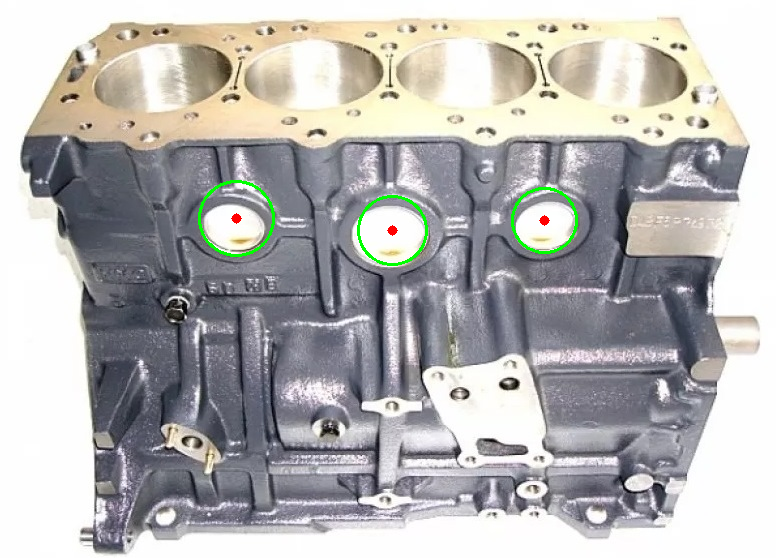

In [19]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# carga de la imagen
imagen = cv2.imread('/content/drive/MyDrive/Colab Notebooks/fotos/block3.jpg', cv2.IMREAD_COLOR)

# convertir la imagen a escala de grises
img_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# suavizar para reducir el ruido y mejorar la detección de bordes
img_foco = cv2.GaussianBlur(img_gris, (9, 9), 2)

# transformada de Hough para detectar el aro
"""
Los valores de minRadius y maxRadius permite detectar los tres aros u orificios
de la parte lateral.
"""
aros = cv2.HoughCircles(
    img_foco,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 100,
    param2 = 30,
    minRadius = 30,
    maxRadius = 42
)

# dibuja el o los aros encontrados
if aros is not None:
    aros = np.uint16(np.around(aros))
    for i in aros[0, :]:
        # dibujar el círculo exterior
        cv2.circle(imagen, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # dibujar el centro del círculo
        cv2.circle(imagen, (i[0], i[1]), 2, (0, 0, 255), 5)

# mostrar la imagen con los círculos detectados
cv2_imshow(imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

# *No hay precisión en los centros de los aros detectados. Esto se debe a que los aros no se ven como circunferencias 'perfectas' por la rotación o ángulo de la imagen. Para lograr un resultado óptimo se deberá orientar perfectamente el block del motor frente al sensor de imagen.*